In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [37]:
N_JPsi = [254432.67307015674, 254096.72933695742, 254117.01851183575, 253661.8401273417, 253221.04488316874, 252956.08386052182, 254718.27987319077, 254658.43058330883, 254573.9551960092]
N_JPsi_error = [3442.459666298909, 3113.8355033053554, 2927.0818118851475, 3407.9952687271843, 3466.3615227486785, 3510.626466099308, 3795.5440386412133, 3660.8545526058365, 3541.733932422076]
Y = ["CB2_100_1.5_X_5.0", "NA60_100_1.5_X_5.0", "CB2_175_1.5_X_5.0", "CB2_100_1.75_X_5.0", "CB2_100_2.0_X_5.0", "CB2_100_2.25_X_5.0", "CB2_100_1.5_X_4.25", "CB2_100_1.5_X_4.50", "CB2_100_1.5_X_4.75"]

In [38]:
mean = np.mean(N_JPsi)
print(mean)

254048.45060472118


In [39]:
stat = np.sqrt(len(N_JPsi_error) * sum(np.square(N_JPsi_error))) / len(N_JPsi_error)
print(stat)

3438.681756856099


In [40]:
syst = np.sqrt(np.sum((N_JPsi - mean)**2) / (len(N_JPsi) - 1))
print(syst)

640.2044779374088


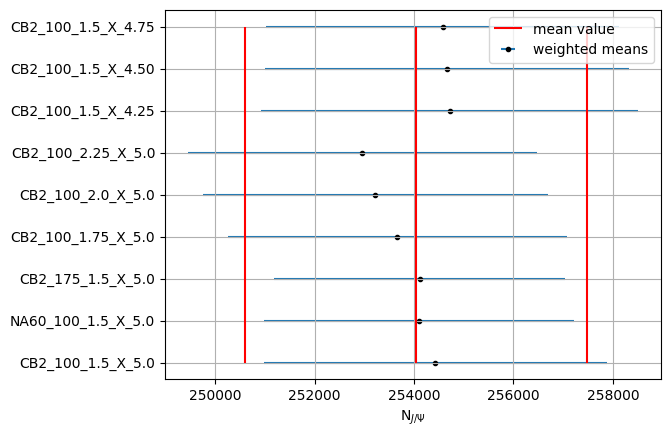

In [64]:
plt.errorbar(N_JPsi, Y, xerr = N_JPsi_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', zorder = 0, label = 'weighted means')
plt.vlines(mean, Y[0], Y[-1], colors = 'r', label = 'mean value')
plt.vlines(mean + stat, Y[0], Y[-1], colors = 'r')
plt.vlines(mean - stat, Y[0], Y[-1], colors = 'r')


plt.grid(True)
plt.xlabel('N$_{J/\Psi}$')
plt.legend()
plt.grid(True)

NameError: name 'X' is not defined

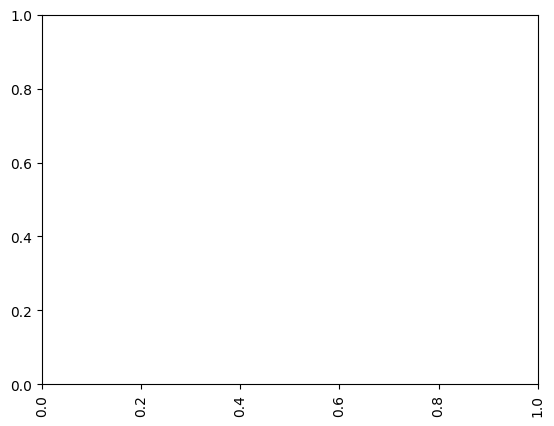

In [6]:
plt.xticks(rotation = 90)
plt.errorbar(X, N_JPsi, N_JPsi_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', zorder = 0, label = 'weighted means')
plt.hlines(mean, X[0], X[-1], colors='r', label = 'mean value')
plt.fill_between(X, mean - stat, mean + stat, color = 'red', alpha = 0.1)

#plt.plot(X[0], N_JPsi[0], visible = False, label = r'N$_{J/\Psi}$ = ' + f'{mean:.0f}' + r' $\pm$ ' + f'{stat:.0f}' + ' (stat.) ' + r'$ \pm$ ' + f'{syst:.0f}' + ' (syst)')

plt.ylabel('N$_{J/\Psi}$')
plt.legend()
plt.grid(True)
plt.savefig('uncertainties.pdf')